<a href="https://colab.research.google.com/github/Rathachai/DA-LAB/blob/gh-pages/code/CH-08/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics Book : CODE

**ISBN** : 978-616-338-169-9

**Author** : Rathachai Chawuthai

**Year** : 2022

**Copyright** © by KMITL

**Link** : https://github.com/Rathachai/DA-LAB



---

## **Chapter 8 : Cluster Analytics**

---

## Principal Component Analysis (PCA)

In [1]:
import io
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Mathematics Calculation

In [2]:
# Data

csvdat = """
x1	x2
1	2
2	3
5	4
6	5
"""

X = pd.read_csv(io.StringIO(csvdat), sep="\t")
X

,x1,x2
0,1,2
1,2,3
2,5,4
3,6,5


<Axes: xlabel='x1', ylabel='x2'>

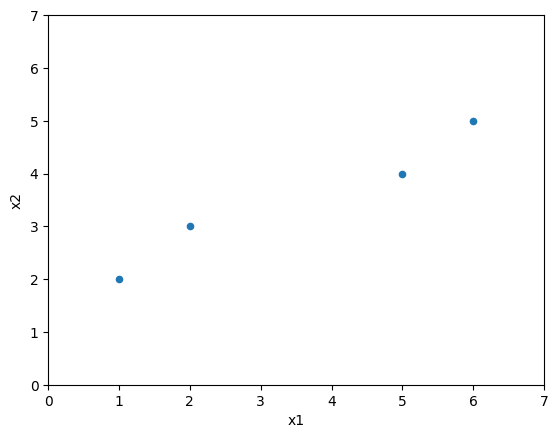

In [3]:
# Plot

X.plot.scatter(x='x1', y='x2', xlim=(0,7), ylim=(0,7))

In [4]:
# Covariance Matrix

A = (X - X.mean())/X.std()

C = (1/(len(X)-1))*(A.T@A)
C

,x1,x2
x1,1.000000,0.976187
x2,0.976187,1.000000


In [5]:
# Eigenvector Matrix

eigval, eigvec = np.linalg.eig(C)
print('Lambda L1, L2 = ', eigval)
print('--------------------------------------------')
print('Eigenvector Matrix')
print(eigvec)

Lambda L1, L2 =  [1.97618706 0.02381294]
--------------------------------------------
Eigenvector Matrix
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [6]:
# Top-K Eigenvector Matrix

k = 1
topk_eigvec = eigvec[:, :k]
topk_eigvec

array([[0.70710678],
       [0.70710678]])

In [7]:
# Featured Matrix
F=X@topk_eigvec

F

,0
0,2.121320
1,3.535534
2,6.363961
3,7.778175


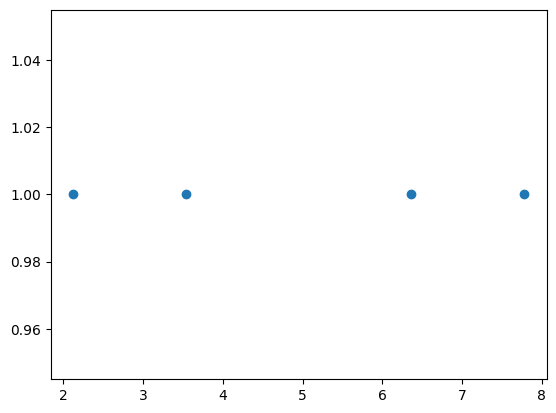

In [8]:
# Plot

plt.scatter(F,[1]*len(F))
plt.xlim=(0,9)
plt.ylim=(0.98,1.02)
plt.show()



---



### PCA with the Iris Dataset

In [9]:
# Data

csv_path = 'https://rathachai.github.io/DA-LAB/datasets/iris.csv'
df = pd.read_csv(csv_path)
df

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
# Select X

X = df[['SL', 'SW', 'PL', 'PW']]

In [11]:
# PCA

F = PCA(n_components=2).fit_transform(X)

In [12]:
# Createing a A Dataframe with Y

XF = pd.DataFrame({'f1':F[:,0].round(2), 'f2':F[:,1].round(2), 'Species':df['Species']})
XF

,f1,f2,Species
0,-2.68,0.33,setosa
1,-2.72,-0.17,setosa
2,-2.89,-0.14,setosa
3,-2.75,-0.31,setosa
4,-2.73,0.33,setosa
...,...,...,...
145,1.94,0.19,virginica
146,1.53,-0.38,virginica
147,1.76,0.08,virginica
148,1.90,0.12,virginica


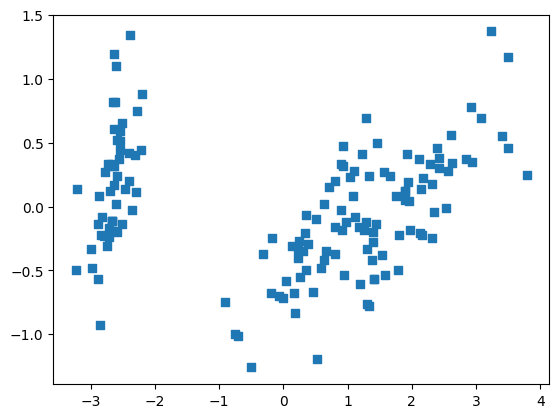

In [13]:
# Plot

plt.scatter(XF['f1'], XF['f2'], marker='s')

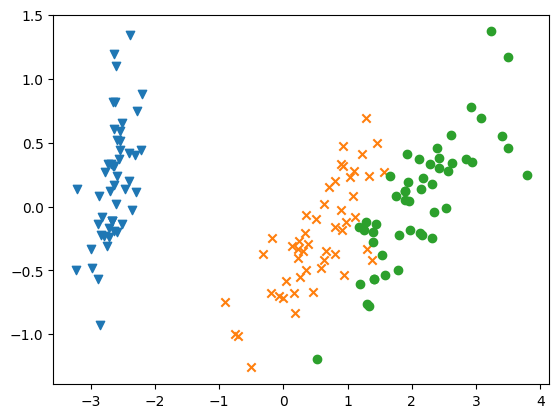

In [14]:
# Plot with Different Species

markers = {'setosa':'v', 'versicolor':'x', 'virginica':'o'}

for species in markers.keys():
  XFsp = XF[XF['Species']==species]
  plt.scatter(XFsp['f1'], XFsp['f2'], marker=markers[species])

plt.show()



---



https://rathachai.creatier.pro/